## Load dataset and inspect basic datastructure

In [1]:
import sklearn
from sklearn import datasets

In [2]:
sklearn.__version__

'0.20.0'

In [15]:
houses = datasets.fetch_california_housing()

In [16]:
dir(houses)

['DESCR', 'data', 'feature_names', 'target']

In [17]:
print(houses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [18]:
len(houses.data), len(houses.target)

(20640, 20640)

In [19]:
houses.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [21]:
for feature, value in zip(houses.feature_names, houses.data[0]):
    print("{}: {}".format(feature, value))
print("PRICE: {}".format(houses.target[0]))

MedInc: 8.3252
HouseAge: 41.0
AveRooms: 6.984126984126984
AveBedrms: 1.0238095238095237
Population: 322.0
AveOccup: 2.5555555555555554
Latitude: 37.88
Longitude: -122.23
PRICE: 4.526


## Convert data to pandas object and inspect basic characteristics

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
print(pd.__version__)

0.23.4


In [32]:
houses_dframe = pd.DataFrame(houses.data, columns=houses.feature_names)
houses_dframe.insert(loc=len(houses_dframe.columns), 
                     column='Price', 
                     value=houses.target)

In [33]:
houses_dframe.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
houses_dframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [38]:
plt.figure(figsize=(20,5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

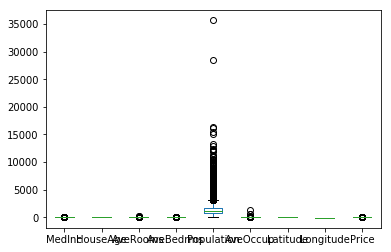

In [39]:
houses_dframe.plot.box()

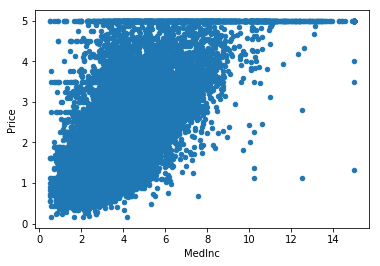

In [45]:
houses_dframe.plot.scatter(x='MedInc', y='Price')

## Linear regression: Scikit Learn

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
reg = LinearRegression()

In [48]:
reg.fit(houses.data, houses.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
houses.data.shape, houses.target.shape

((20640, 8), (20640,))

In [57]:
houses.data[0].reshape(1, -1).shape

(1, 8)

In [74]:
for index in range(10):
    sample = houses.data[index].reshape(1, -1)
    actual = houses.target[index]
    predicted = reg.predict(sample)
    error = abs(predicted[0]-actual)

    print("Price. Predicted: {:.3f} Actual: {:.3f} Error: {:.3f}".format(predicted[0], actual, error))

Price. Predicted: 4.132 Actual: 4.526 Error: 0.394
Price. Predicted: 3.977 Actual: 3.585 Error: 0.392
Price. Predicted: 3.677 Actual: 3.521 Error: 0.156
Price. Predicted: 3.242 Actual: 3.413 Error: 0.171
Price. Predicted: 2.414 Actual: 3.422 Error: 1.008
Price. Predicted: 2.675 Actual: 2.697 Error: 0.022
Price. Predicted: 2.395 Actual: 2.992 Error: 0.597
Price. Predicted: 2.247 Actual: 2.414 Error: 0.167
Price. Predicted: 1.792 Actual: 2.267 Error: 0.475
Price. Predicted: 2.428 Actual: 2.611 Error: 0.183
